In [10]:
import sympy as sp

x = sp.Symbol('x')

M = sp.Matrix([[2, -4, 2*(x**2) - 4*x + 3, 0],
               [0, 2, -4, 2*(x**2) - 4*x + 3], 
               [1, 2*x -3, x**2 -5*x +4, 0], 
               [0, 1, 2*x -3, x**2 -5*x +4]])

det = M.det()

print(det)

16*x**4 - 48*x**3 + 48*x**2 - 28*x + 11


In [11]:
# code to polynomial interpolation using divided difference
import numpy as np
import cmath
# x and y values
def divided_diff(x, y):
    n = len(x)
    F_matrix = np.zeros((n, n))
    F_matrix = np.diag(y)
    for j in range(0,n):
        i=j-1
        while i>=0:
            # print("xi-xj", x[i], x[j])
            F_matrix[i,j]=(F_matrix[i,j-1]-F_matrix[i+1,j])/(x[i]-x[j])
            i=i-1
    return F_matrix

def get_quadratic_coeff(F, x):
    # print(F, x)
    a = F[0,2]
    c = F[0,0] + x[0]*x[1]*F[0,2] -x[0]*F[0,1]
    b = F[0,1] -(x[0]+x[1])*F[0,2]
    return a,b,c

def get_quadratic_roots(a, b, c):
    D = b**2 - 4*a*c
    if D >= 0:
        x1 = (-b + np.sqrt(D)) / (2*a)
        x2 = (-b - np.sqrt(D)) / (2*a)
    else:
        x1 = (-b + cmath.sqrt(D)) / (2*a)
        x2 = (-b - cmath.sqrt(D)) / (2*a)
    return x1, x2

In [18]:
def poly(x, roots=[]):
    if roots == []:
        return 16*(x**4) -48*(x**3) + 48*(x**2) -28*x + 11
    else:
        p = 1
        for r in roots:
            p = p*(x-r)
        return (16*(x**4) -48*(x**3) + 48*(x**2) -28*x + 11)/p

In [19]:
def mueller_method_1root(x, y, roots):
    for i in range(1000):
        F = divided_diff(x, y)
        a,b,c = get_quadratic_coeff(F, x)
        # print(a,b,c)
        r1, r2 = get_quadratic_roots(a,b,c)
        if abs(poly(r1, roots)) < 1e-7:
            return r1
        if abs(poly(r2, roots)) < 1e-7:
            return r2
        else:
            if abs(poly(r1, roots)) < abs(poly(r2, roots)):
                x = [x[1], x[2], r1]
                y = [y[1], y[2], poly(r1, roots)]
            else:
                x = [x[1], x[2], r2]
                y = [y[1], y[2], poly(r2, roots)]
    return None

# x is random 3 numbers in range -10 to 10
x = [0, 1, 2]
y = [poly(i) for i in x]


r1 = mueller_method_1root(x, y, [])
print("root1 :", r1)

# x is random 3 numbers in range -10 to 10
x = [10, 5, 2]
y = [poly(i, [r1]) for i in x]

r2 = mueller_method_1root(x, y, [r1])
print("root2 :", r2)

# x is random 3 numbers in range -10 to 10
x = [0, 1, 2]
y = [poly(i, [r1, r2]) for i in x]

r3 = mueller_method_1root(x, y, [r1, r2])
print("root3 :", r3)


x = [0, 1, 2]
y = [poly(i, [r1, r2, r3]) for i in x]
r4 = mueller_method_1root(x, y, [r1, r2, r3])
print("root3 :", r4)

root1 : 0.9159413054963125
root2 : (1.7020926832538432+5.6684567414838495e-14j)
root3 : (0.19098300562462134-0.6360098247566811j)
root3 : (0.19098300518815955+0.6360098243267909j)


/var/folders/43/5971cqb109bfv3wb3b47x9tc0000gn/T/ipykernel_53734/1486817712.py:29: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z1, levels=[0], colors='blue', linewidths=2, label="Circle $x^2 + y^2 = 1$")
/var/folders/43/5971cqb109bfv3wb3b47x9tc0000gn/T/ipykernel_53734/1486817712.py:32: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z2, levels=[0], colors='red', linewidths=2, label="Cubic $x^3 - 3xy^2 = 0$")


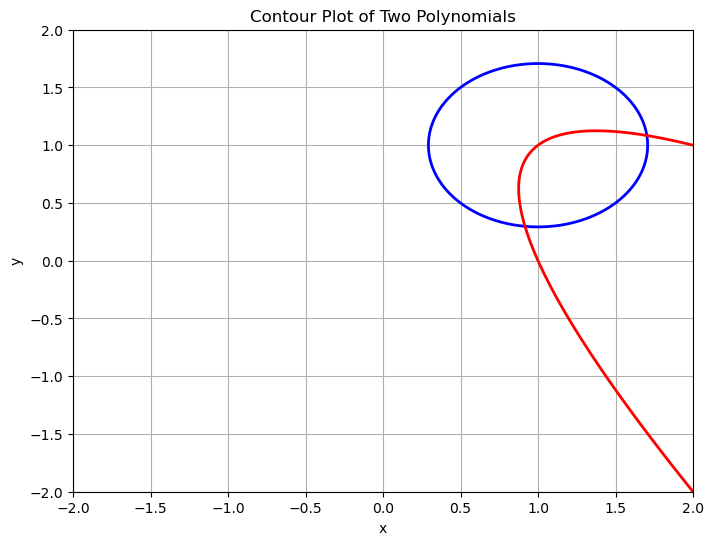

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbolic variables
x, y = sp.symbols('x y')

# Define two polynomials
poly1 = 2*(x**2) + 2*(y**2) -4*x -4*y +3  # Circle equation: x^2 + y^2 = 1
poly2 = x**2 + y**2 + 2*x*y -5*x -3*y + 4  # A cubic polynomial (lemniscate-like curve)

# Convert polynomials to numerical functions
poly1_func = sp.lambdify((x, y), poly1, 'numpy')
poly2_func = sp.lambdify((x, y), poly2, 'numpy')

# Create a grid of points
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute Z values for the contours
Z1 = poly1_func(X, Y)
Z2 = poly2_func(X, Y)

# Plot the contour of the two polynomials
plt.figure(figsize=(8, 6))

# Contour for the first polynomial (circle)
plt.contour(X, Y, Z1, levels=[0], colors='blue', linewidths=2, label="Circle $x^2 + y^2 = 1$")

# Contour for the second polynomial (lemniscate-like curve)
plt.contour(X, Y, Z2, levels=[0], colors='red', linewidths=2, label="Cubic $x^3 - 3xy^2 = 0$")

# Set plot labels and title
plt.title("Contour Plot of Two Polynomials")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

# Show the plot
plt.show()


In [25]:
x = 1.702
print(2*x -3)

0.4039999999999999
